In [1]:
from typing import Mapping, Any, Union, List, Optional, Callable

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

%matplotlib inline

sns.set_style()

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

## Read data

In [2]:
df = pd.read_csv('data/2_6.csv', sep=';', header=None)
df = df.rename(columns={
    0:"y",
    1:"x1",
    2:"x2",
    3:"x3",
    4:"x4",
})

df

,y,x1,x2,x3,x4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


## Transform 'y' column

In [3]:
unique_y_values = df['y'].unique()

y_letter2number = {el:i for el,i in enumerate(unique_y_values)}
y_number2letter = {v:k for k,v in y_letter2number.items() }

In [4]:
df['y'] = df['y'].map(y_number2letter)

## Data observation

In [5]:
print(f"Number of NaNs: \n{df.isna().sum()}")

Number of NaNs: 
y     0
x1    0
x2    0
x3    0
x4    0
dtype: int64


2    288
1    288
0     49
Name: y, dtype: int64


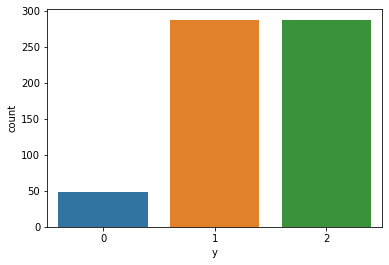

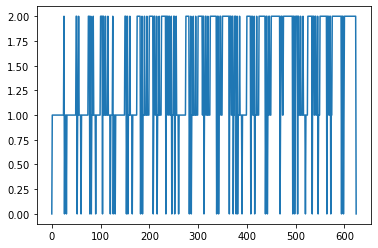

5    125
4    125
3    125
2    125
1    125
Name: x1, dtype: int64


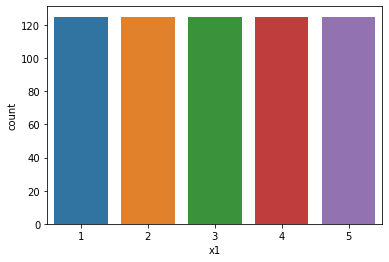

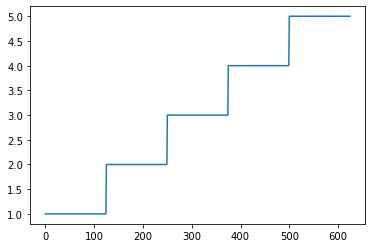

5    125
4    125
3    125
2    125
1    125
Name: x2, dtype: int64


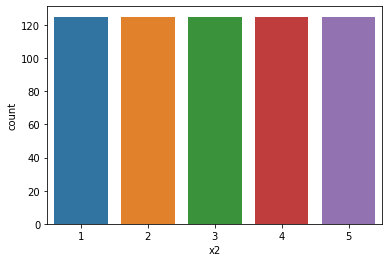

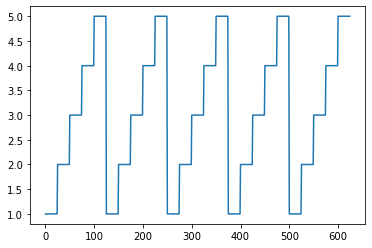

5    125
4    125
3    125
2    125
1    125
Name: x3, dtype: int64


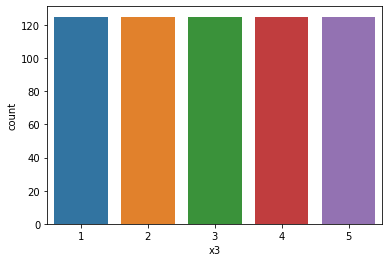

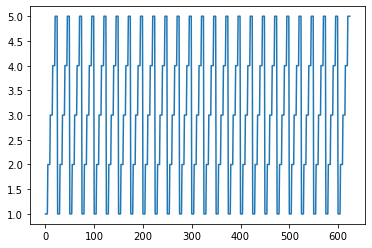

5    125
4    125
3    125
2    125
1    125
Name: x4, dtype: int64


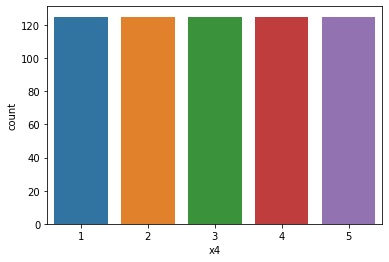

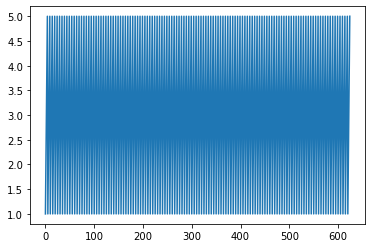

In [6]:
print(df['y'].value_counts())
sns.countplot(df['y'])
plt.show()
df['y'].plot()
plt.show()

print(df['x1'].value_counts())
sns.countplot(df['x1'])
plt.show()
df['x1'].plot()
plt.show()

print(df['x2'].value_counts())
sns.countplot(df['x2'])
plt.show()
df['x2'].plot()
plt.show()

print(df['x3'].value_counts())
sns.countplot(df['x3'])
plt.show()
df['x3'].plot()
plt.show()

print(df['x4'].value_counts())
sns.countplot(df['x4'])
plt.show()
df['x4'].plot()
plt.show()

## Fit and Validate function

In [7]:
RANDOM_STATES = [1144, 43, 56, 822, 2323, 232, 223, 21215, 484, 8483, 2003]

In [8]:
def do_cross_val(
    X: pd.DataFrame,
    y: pd.Series,
    folds: object,
    score_func: Callable,
    estimator: object
):
    scores = []
    preds = []
    targets = []
    for train_idx, val_idx in folds.split(X,y):
        one_pred = estimator.fit(
            X.iloc[train_idx], y.iloc[train_idx]
        ).predict(X.iloc[val_idx])
        
        one_score = score_func(y.iloc[val_idx], one_pred)
        preds += list(one_pred)
        targets += list(y.iloc[val_idx])
        scores.append(one_score)
        
    return {
        "scores": scores,
        "preds": preds,
        "targets": targets
    }

def fit_validate(
    # Data specific config
    input_df: pd.DataFrame,
    target_col: str,
    # Model specific config
    ml_model,
    # Validation specific config
    n_splits: int = 5,
    random_state: List[int] = [42],
    verbose: bool = True
):
    X_train = input_df.drop(columns=target_col)
    y_train = input_df[target_col]
    
    cv_result = []
    cv_targets = []
    cv_preds = []
    for r_s in random_state:
    
        folds = StratifiedKFold(
            n_splits=n_splits, 
            shuffle=True, 
            random_state=r_s
        )
        one_cv_result = do_cross_val(
                            estimator=ml_model, 
                            X=X_train, 
                            y=y_train,
                            folds=folds, 
                            score_func=accuracy_score
        )
        cv_result.append(one_cv_result['scores'])
        cv_targets.append(one_cv_result['targets'])
        cv_preds.append(one_cv_result['preds'])
        
    result = {
        "folds_result": cv_result,
        "folds_targets":cv_targets,
        "cv_preds": cv_preds,
        "mean_score": np.mean(cv_result),
        "std_score": np.std(cv_result)
    }
    
    if verbose:
        print(f"Mean score: {result['mean_score']}")
        print(f"Score std: {result['std_score']}")
    
    return result

## GaussianNB

In [9]:
fit_validate(
    input_df=df,
    target_col='y',
    ml_model=GaussianNB(),
    random_state=RANDOM_STATES
);

Mean score: 0.9019636363636365
Score std: 0.012874165302317867


## BernoulliNB

In [10]:
fit_validate(
    input_df=df,
    target_col='y',
    ml_model=BernoulliNB(),
    random_state=RANDOM_STATES
);

Mean score: 0.4575999999999999
Score std: 0.0032000000000000036


## MultinomialNB

In [11]:
fit_validate(
    input_df=df,
    target_col='y',
    ml_model=MultinomialNB(),
    random_state=RANDOM_STATES
);

Mean score: 0.8722909090909091
Score std: 0.019354748280247306


## SVC

In [12]:
fit_validate(
    input_df=df,
    target_col='y',
    ml_model=SVC(),
    random_state=RANDOM_STATES
);

Mean score: 0.9047272727272728
Score std: 0.010035309562566024


## GradientBoostingClassifier

In [13]:
fit_validate(
    input_df=df,
    target_col='y',
    ml_model=GradientBoostingClassifier(n_estimators=1_000),
    random_state=RANDOM_STATES
);

Mean score: 0.8626909090909091
Score std: 0.023671135262764646
